In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os

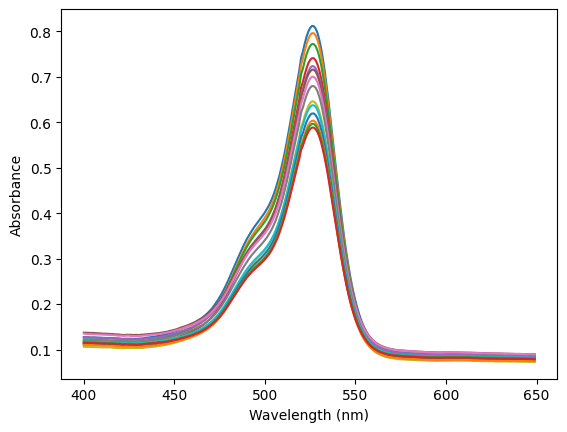

In [2]:
data_folder = '../../data/'

data = pd.DataFrame()

for file in os.listdir(data_folder):
    if file.endswith('.TXT'):
        file_path = os.path.join(data_folder, file)
        run = pd.read_csv(file_path, skiprows=20, sep='\t', header=None, names=['Wavelength', 'Absorbance'])
        # The frist time add the wavelength to the data
        if data.empty:
            data['Wavelength'] = run['Wavelength']
        # Add the run to the data
        run_name = int(''.join([i for i in file if i.isdigit()]))
        data[str(run_name)] = run['Absorbance']
        plt.plot(run['Wavelength'], run['Absorbance'], label=file)
        plt.xlabel('Wavelength (nm)')
        plt.ylabel('Absorbance')


In [43]:
output_path = os.path.join(data_folder, 'combined.csv')
data.to_csv(output_path, index=False)

In [3]:
data.head()

,Wavelength,0,5,10,15,20,25,30,35,40,50,60,70,80,90
0,649.0,0.08592,0.08071,0.08370,0.07775,0.08537,0.08970,0.08942,0.08048,0.07283,0.08191,0.07893,0.07445,0.08061,0.07852
1,648.0,0.08587,0.08033,0.08354,0.07783,0.08540,0.08975,0.08943,0.08036,0.07288,0.08241,0.07906,0.07451,0.08090,0.07881
2,647.0,0.08587,0.08049,0.08375,0.07798,0.08540,0.08960,0.08971,0.08048,0.07298,0.08241,0.07912,0.07464,0.08079,0.07881
3,646.0,0.08620,0.08070,0.08379,0.07805,0.08569,0.08982,0.09001,0.08043,0.07299,0.08258,0.07933,0.07444,0.08089,0.07897
4,645.0,0.08621,0.08071,0.08393,0.07816,0.08567,0.08990,0.08966,0.08065,0.07304,0.08269,0.07930,0.07451,0.08104,0.07898


In [4]:
# Calculate background mean from the fris 39 rows
background = data.iloc[:39, 1:].mean(axis=0)
background = background.tolist()

# Subtract the background from the data
data.iloc[:, 1:] = data.iloc[:, 1:].sub(background)

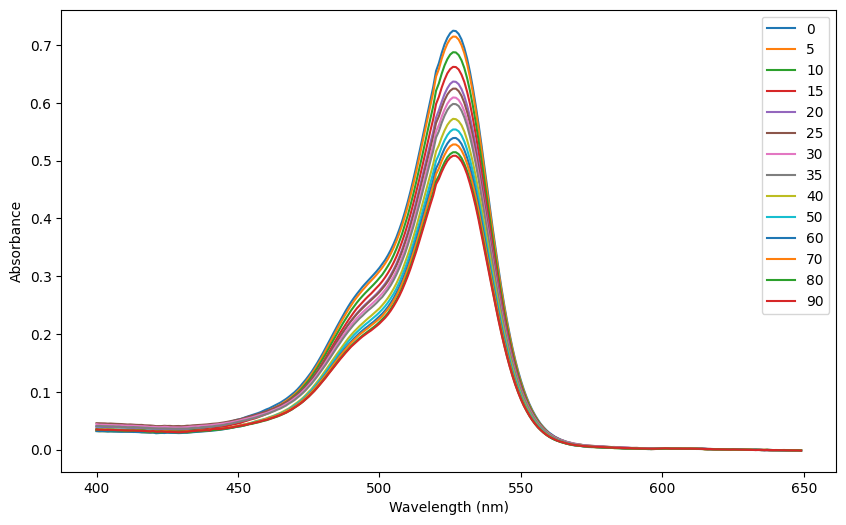

In [5]:
# Plot the corrected data
plt.figure( figsize=(10, 6) )
for col in data.columns[1:]:
    plt.plot(data['Wavelength'], data[col], label=col)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.legend()
plt.show()

In [48]:
# Export normalized data
output_path = os.path.join(data_folder, 'normalized.csv')
data.to_csv(output_path, index=False)

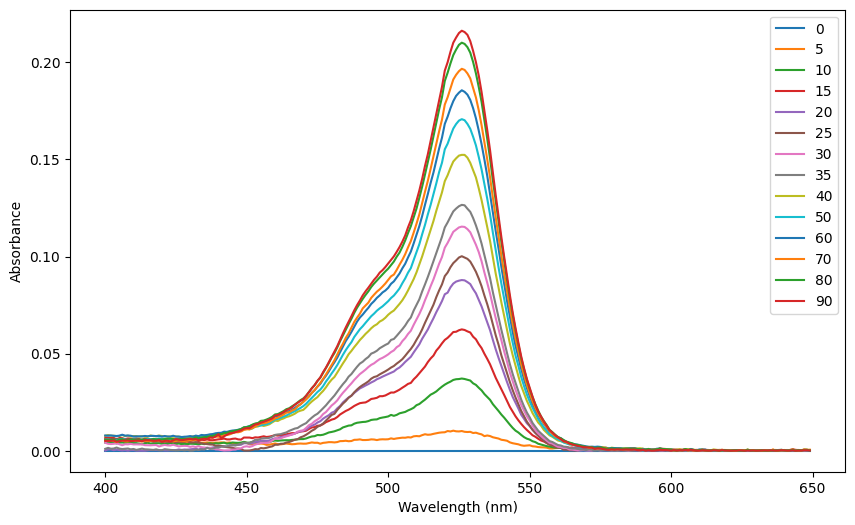

In [7]:
# Subtract to all the spectrumns the 0th spectrum
normalized_data = data.copy()
normalized_data.iloc[:, 1:] = normalized_data.iloc[:, 1:].sub(normalized_data.iloc[:, 1].values, axis=0)
# Take the absolute value of the data
normalized_data.iloc[:, 1:] = normalized_data.iloc[:, 1:].abs()

# Plot the corrected data
plt.figure( figsize=(10, 6) )
for col in normalized_data.columns[1:]:
    plt.plot(normalized_data['Wavelength'], normalized_data[col], label=col)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.legend()
plt.show()

In [10]:
# Export normalized data
output_path = os.path.join(data_folder, 'subtracted.csv')
normalized_data.to_csv(output_path, index=False)

: 

### Fit of peaks
We use parabolic fit to find good value for the peak of each run